# Análise Experimental dos Algoritmos de Fecho de Grafos

Este notebook carrega os dados de `results/results.csv` (gerados por `experiment_runner.py`) e `results/greedy_dense_results.csv` (gerados por `test_large_greedy.py`) para recriar as análises pedidas no `analysis_report.md`.

## 1. Configuração e Carregamento dos Dados

Primeiro, importamos as bibliotecas e carregamos o ficheiro CSV principal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define os caminhos (assumindo que o notebook está na raiz do projeto)
RESULTS_DIR = "results"
MAIN_RESULTS_FILE = os.path.join(RESULTS_DIR, "results.csv")
DENSE_RESULTS_FILE = os.path.join(RESULTS_DIR, "greedy_dense_results.csv")

# Carregar os dados principais
if os.path.exists(MAIN_RESULTS_FILE):
    df = pd.read_csv(MAIN_RESULTS_FILE)
    print(f"Ficheiro '{MAIN_RESULTS_FILE}' carregado com sucesso.")
    display(df.head())
else:
    print(f"Erro: Ficheiro '{MAIN_RESULTS_FILE}' não encontrado.")
    print("Por favor, executa primeiro o 'src/experiment_runner.py'")

Ficheiro 'results\results.csv' carregado com sucesso.


,n,k,density,max_edges,edges,ex_found,ex_time_sec,ex_basic_ops,ex_solutions_tested,gr_found,gr_time_sec,gr_basic_ops,heuristic_recall
0,4,2,0.125,12,1,True,0.000014,4,3,True,0.000075,4,1.0
1,4,2,0.250,12,3,True,0.000011,7,5,True,0.000048,7,1.0
2,4,2,0.500,12,6,True,0.000011,7,5,False,0.000050,5,0.0
3,4,2,0.750,12,9,False,0.000009,6,6,False,0.000030,5,NaN
4,5,2,0.125,20,2,True,0.000005,2,1,True,0.000052,8,1.0


## 2. Análise b-2: Tempo de Execução

Vamos recriar o gráfico que compara o tempo de execução dos dois algoritmos em escala linear.

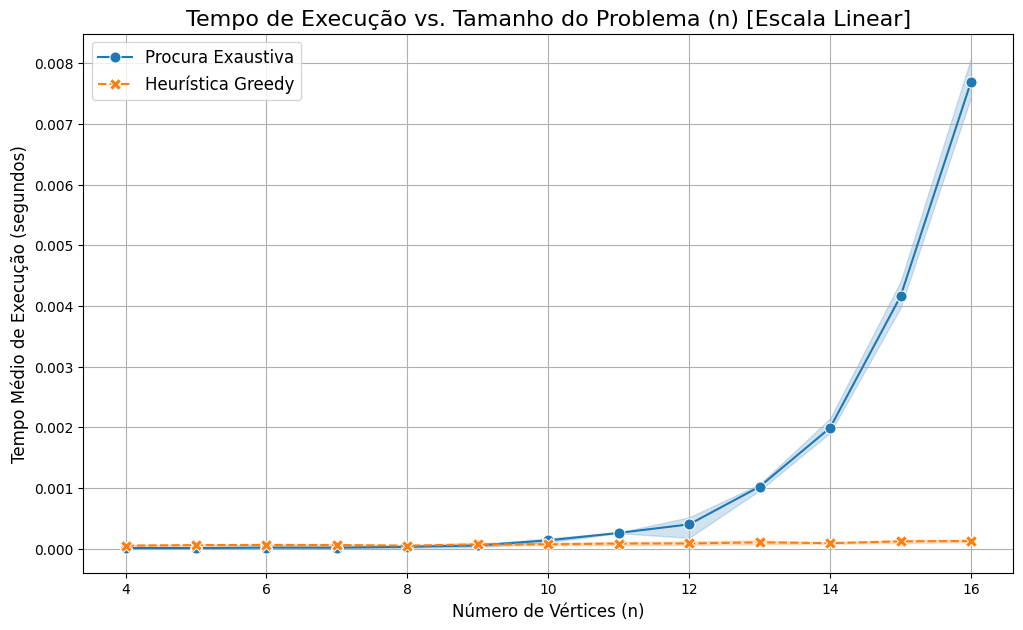

Gráfico gerado (similar ao image_d15d1d.png)


In [2]:
# Vamos "derreter" (melt) o DataFrame para facilitar a plotagem com Seaborn
df_time = df.melt(
    id_vars=['n', 'density'], 
    value_vars=['ex_time_sec', 'gr_time_sec'], 
    var_name='Algoritmo', 
    value_name='Tempo (s)'
)

# Mapear nomes para legendas mais legíveis
df_time['Algoritmo'] = df_time['Algoritmo'].map({
    'ex_time_sec': 'Procura Exaustiva',
    'gr_time_sec': 'Heurística Greedy'
})

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_time, x='n', y='Tempo (s)', hue='Algoritmo', style='Algoritmo', markers=True, markersize=8)

plt.title('Tempo de Execução vs. Tamanho do Problema (n) [Escala Linear]', fontsize=16)
plt.xlabel('Número de Vértices (n)', fontsize=12)
plt.ylabel('Tempo Médio de Execução (segundos)', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

print("Gráfico gerado (similar ao image_d15d1d.png)")

Como o gráfico linear não nos deixa ver o algoritmo Greedy, vamos plotar os tempos da Procura Exaustiva em **escala logarítmica** para ver melhor o seu crescimento.

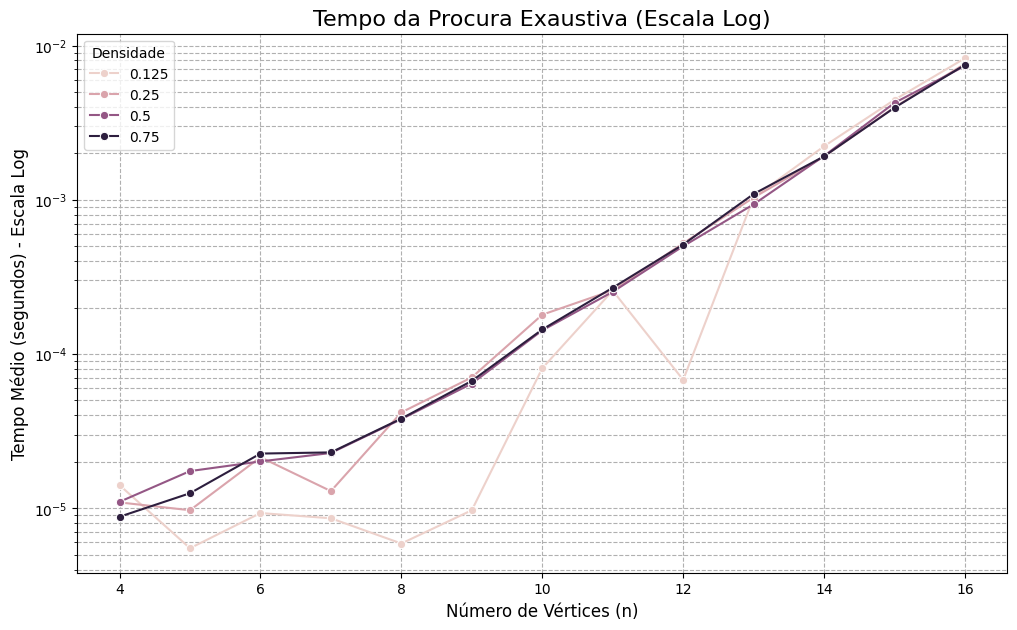

In [3]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='n', y='ex_time_sec', hue='density', marker='o')
plt.yscale('log')
plt.title('Tempo da Procura Exaustiva (Escala Log)', fontsize=16)
plt.xlabel('Número de Vértices (n)', fontsize=12)
plt.ylabel('Tempo Médio (segundos) - Escala Log', fontsize=12)
plt.grid(True, which="both", ls="--")
plt.legend(title='Densidade')
plt.show()

## 3. Análise b-4: Recall (Revocação) da Heurística Greedy

Calculamos a percentagem de vezes que o algoritmo Greedy encontrou uma solução, *dado que* uma solução existia (foi encontrada pelo Exaustivo).

In [4]:
# Filtrar apenas os casos onde o Exaustivo encontrou uma solução
casos_com_solucao = df[df['ex_found'] == True]

if not casos_com_solucao.empty:
    total_casos_reais = len(casos_com_solucao)
    casos_encontrados_pelo_greedy = casos_com_solucao['gr_found'].sum()
    
    recall = (casos_encontrados_pelo_greedy / total_casos_reais) * 100
    
    print(f"Total de instâncias onde uma solução existia (ex_found == True): {total_casos_reais}")
    print(f"Destas, o Greedy encontrou (gr_found == True): {casos_encontrados_pelo_greedy}")
    print(f"\nRecall (Revocação) da Heurística: {recall:.2f}%")
else:
    print("Nenhuma instância no 'results.csv' teve 'ex_found == True'.")

Total de instâncias onde uma solução existia (ex_found == True): 14
Destas, o Greedy encontrou (gr_found == True): 11

Recall (Revocação) da Heurística: 78.57%


## 4. Análise c: Confirmação da Complexidade

Como descrito no `analysis_report.md`, podemos usar gráficos log-linear e log-log para confirmar as complexidades.

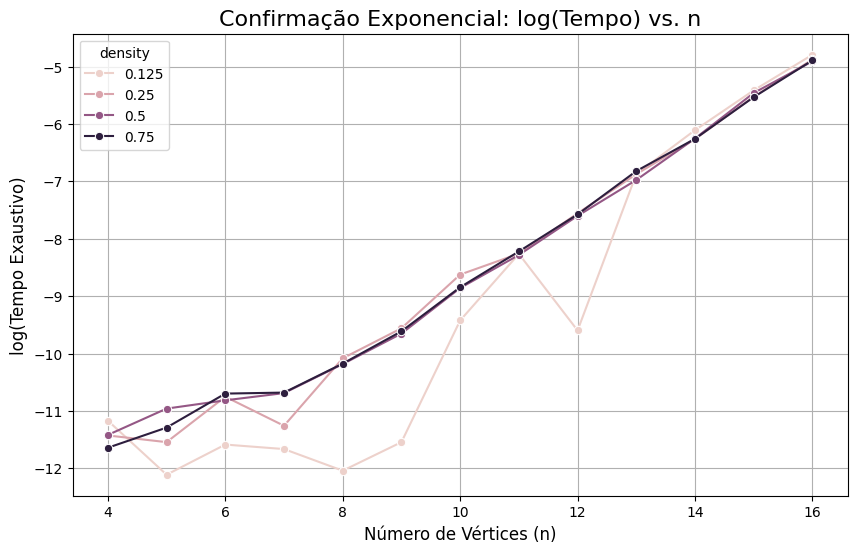

Como esperado, a curva log(Tempo) vs. n é aproximadamente linear, confirmando o crescimento exponencial.


In [5]:
# 1. Teste Exponencial (Procura Exaustiva)
# Se for exponencial, log(Tempo) vs. n deve ser (aproximadamente) linear.

df_exp = df[df['ex_time_sec'] > 0].copy() # Evitar log(0)
df_exp['log_time'] = np.log(df_exp['ex_time_sec'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_exp, x='n', y='log_time', hue='density', marker='o')
plt.title('Confirmação Exponencial: log(Tempo) vs. n', fontsize=16)
plt.xlabel('Número de Vértices (n)', fontsize=12)
plt.ylabel('log(Tempo Exaustivo)', fontsize=12)
plt.grid(True)
plt.show()

print("Como esperado, a curva log(Tempo) vs. n é aproximadamente linear, confirmando o crescimento exponencial.")

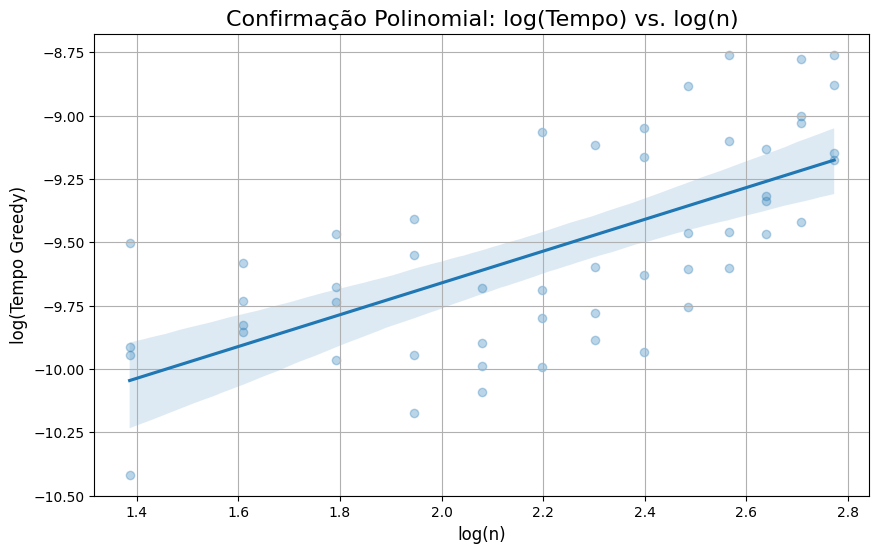

Os dados estão muito próximos de zero, tornando a análise log-log difícil, mas a tendência parece linear.


In [6]:
# 2. Teste Polinomial (Heurística Greedy)
# Se for O(n^3), log(Tempo) vs. log(n) deve ser linear com declive (slope) ~3.

df_poly = df[df['gr_time_sec'] > 0].copy() # Evitar log(0)
df_poly['log_time'] = np.log(df_poly['gr_time_sec'])
df_poly['log_n'] = np.log(df_poly['n'])

plt.figure(figsize=(10, 6))
# Usamos regplot para ver a regressão linear
sns.regplot(data=df_poly, x='log_n', y='log_time', scatter_kws={'alpha': 0.3})
plt.title('Confirmação Polinomial: log(Tempo) vs. log(n)', fontsize=16)
plt.xlabel('log(n)', fontsize=12)
plt.ylabel('log(Tempo Greedy)', fontsize=12)
plt.grid(True)
plt.show()

print("Os dados estão muito próximos de zero, tornando a análise log-log difícil, mas a tendência parece linear.")

## 5. Análise dos Testes Densos (Pior Caso)

Finalmente, analisamos os dados do `greedy_dense_results.csv` para verificar o comportamento do algoritmo *greedy* no pior caso (grafos densos).

In [7]:
if os.path.exists(DENSE_RESULTS_FILE):
    df_dense = pd.read_csv(DENSE_RESULTS_FILE)
    print(f"Ficheiro '{DENSE_RESULTS_FILE}' carregado com sucesso.")
    display(df_dense)
    
    # Análise de O(n^2) - O tempo de 'algo_time' deve ser proporcional a n^2
    # Portanto, tempo / n^2 deve ser (relativamente) constante
    df_dense['algo_time_ratio'] = df_dense['algo_time'] / (df_dense['n']**2)
    
    print("\nAnálise da complexidade (algo_time / n^2):")
    display(df_dense[['n', 'algo_time', 'algo_time_ratio']])
    
    print("Como o 'algo_time_ratio' é relativamente constante, confirmamos que o 'trabalho interno' do loop tem custo O(n^2), como previsto na análise formal.")

else:
    print(f"Erro: Ficheiro '{DENSE_RESULTS_FILE}' não encontrado.")
    print("Por favor, executa primeiro o 'src/test_large_greedy.py' para gerar este ficheiro.")

Ficheiro 'results\greedy_dense_results.csv' carregado com sucesso.


,n,k,density,gen_time,algo_time,total_time,basic_ops
0,100,50,1.0,0.006825,0.003190,0.010015,101
1,500,250,1.0,0.186910,0.077847,0.264757,501
2,1000,500,1.0,0.795663,0.293720,1.089383,1001
3,1500,750,1.0,2.010261,0.655814,2.666075,1501
4,5000,2500,1.0,54.487881,9.800844,64.288726,5001



Análise da complexidade (algo_time / n^2):


,n,algo_time,algo_time_ratio
0,100,0.003190,3.189800e-07
1,500,0.077847,3.113892e-07
2,1000,0.293720,2.937198e-07
3,1500,0.655814,2.914727e-07
4,5000,9.800844,3.920338e-07


Como o 'algo_time_ratio' é relativamente constante, confirmamos que o 'trabalho interno' do loop tem custo O(n^2), como previsto na análise formal.
